## Load libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [3]:
#Filter warnings
warnings.filterwarnings("ignore")

## Load Data

In [4]:
dataset=pd.read_csv("adult.csv")
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


### *Check for null values and show the datatypes*

In [5]:
print(dataset.isnull().sum())
print(dataset.dtypes)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


### *Look at data*

In [6]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
#removing '?' containing rows
dataset = dataset[(dataset != '?').all(axis=1)]
#label the income objects as 0 and 1
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})

## Analyze data

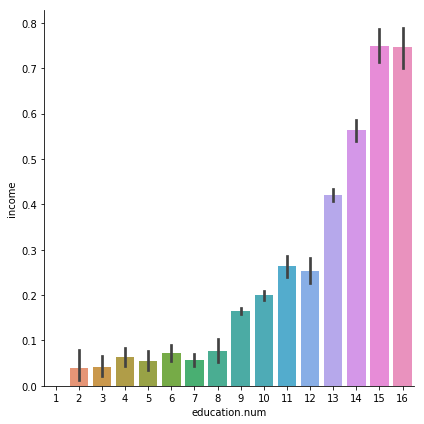

In [8]:
sns.factorplot(x='education.num',y='income',data=dataset,kind='bar',size=6)
plt.show()

Higher the value ,higher the probability of income greater than 50k(Obviously!)

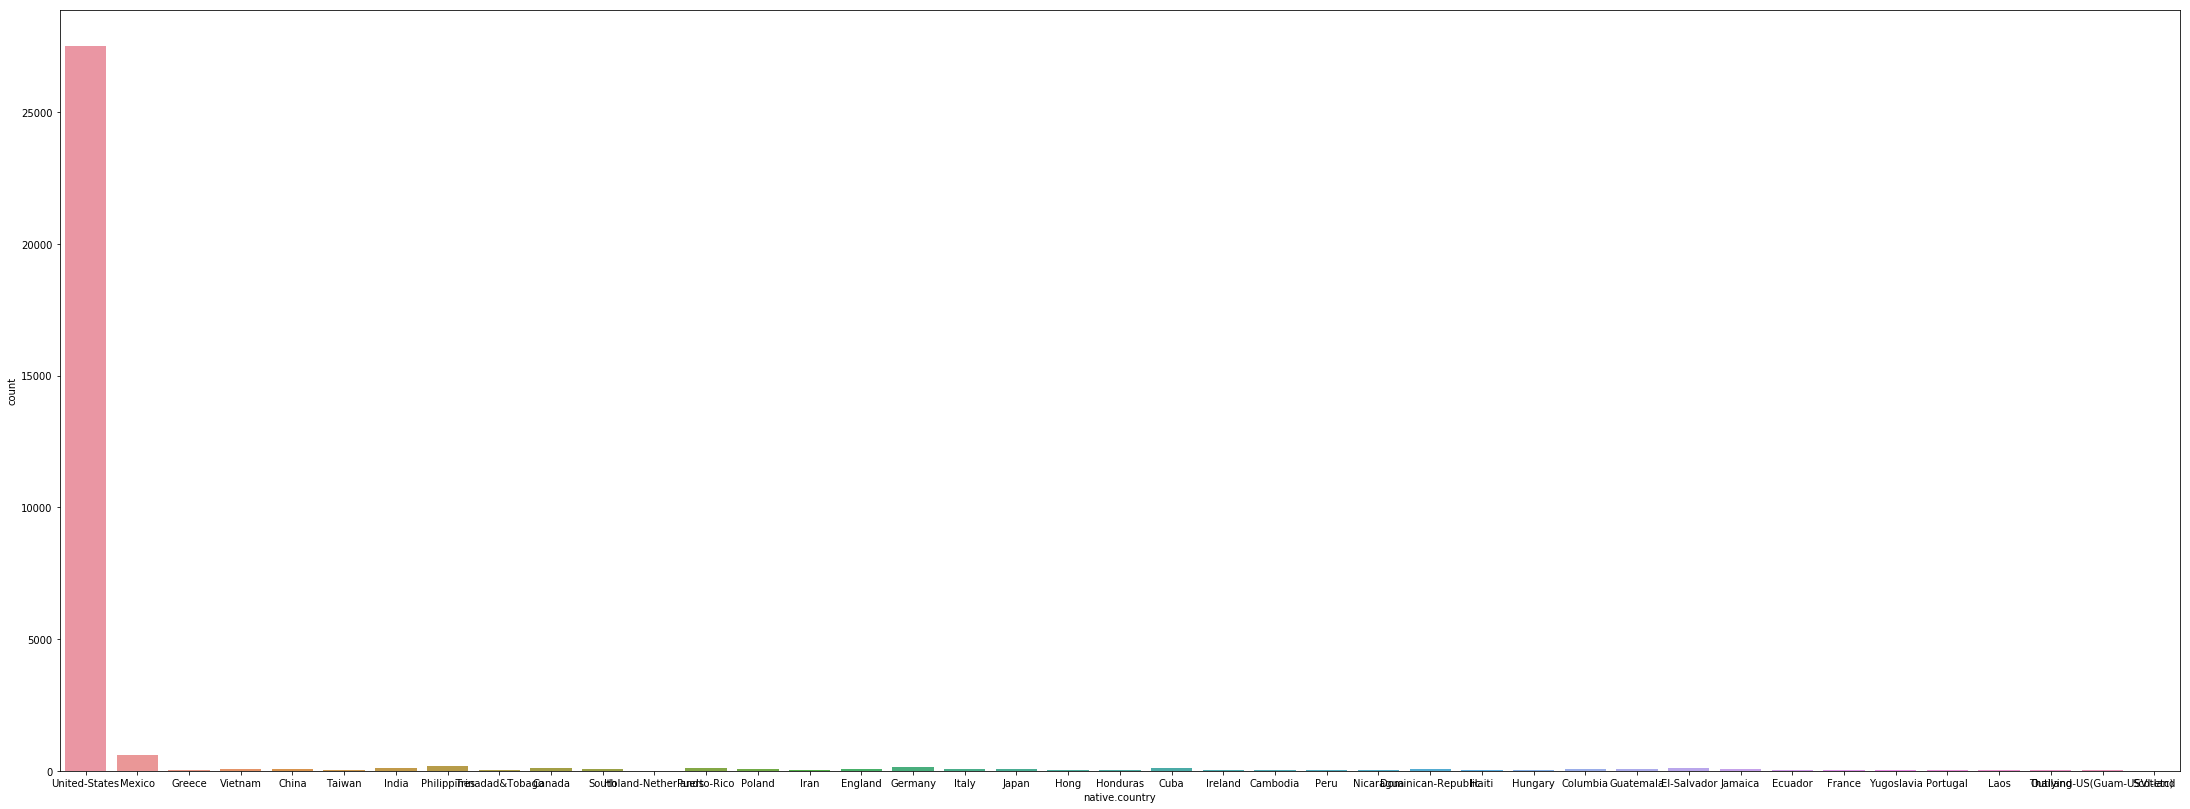

In [9]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native.country',data=dataset)
plt.show()

Here most people are from the USA,so we can drop this column as it creates unnecessary bias.

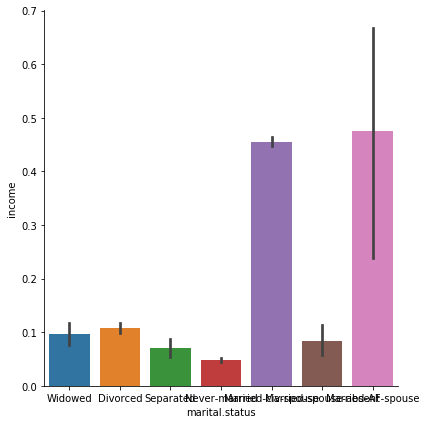

In [10]:
#marital.status vs income
sns.factorplot(x='marital.status',y='income',data=dataset,kind='bar',size=6)
plt.show()

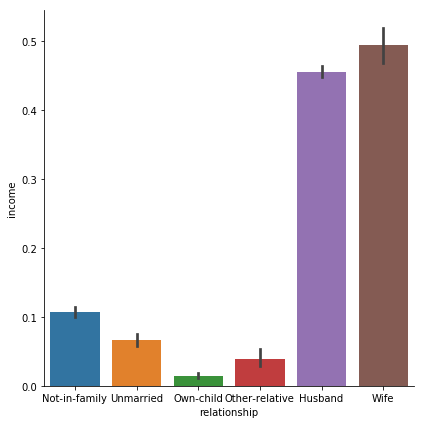

In [11]:
#relationship vs income
sns.factorplot(x='relationship',y='income',data=dataset,kind='bar',size=6)
plt.show()

Aha! You can clearly see that "relationship" and "marital.status", look similar i.e. tell us the same thing.

I will prove this now,first let us do some changes to data so it is simpler to understand.

## Feature Engineering

In [12]:
#we can reformat marital.status values to single and married
dataset['marital.status']=dataset['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

 ### *Label encoding*

In [13]:
from sklearn.preprocessing import LabelEncoder
for column in dataset:
    enc=LabelEncoder()
    if dataset.dtypes[column]==np.object:
         dataset[column]=enc.fit_transform(dataset[column])

### *Correlation using heatmap*

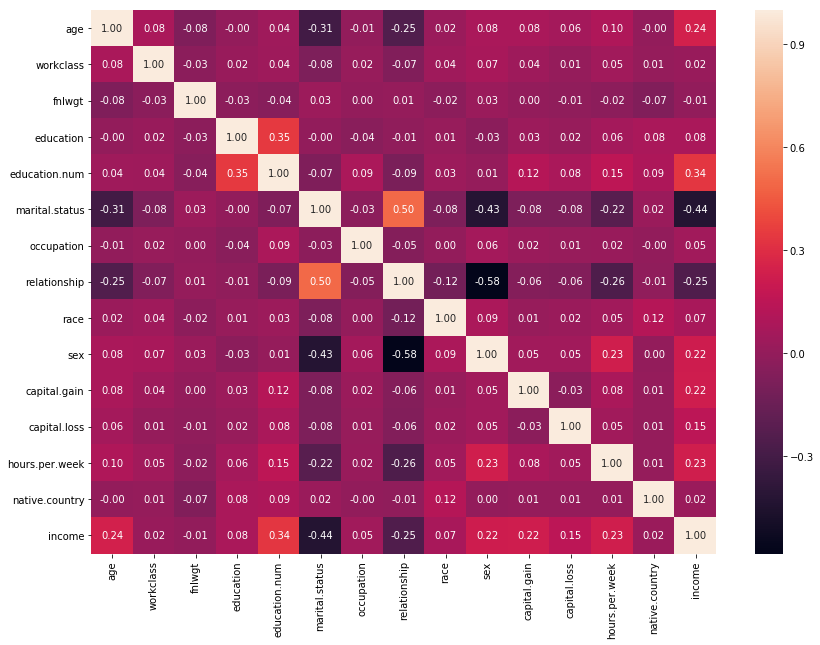

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')
plt.show()

 As we can see from the heatmap "education" and "education.num" are highly correlated, same can be said about the "marital.status" and "relationship" ,thus,we can drop "relationship" and "education".

In [15]:
dataset=dataset.drop(['relationship','education'],axis=1)

 We can also drop "occupation" as "workclass" is sufficient.
Furthermore,"fnlwgt" is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the label.Also we  drop the "native.country" as more are from single country(USA) which can cause bias.

In [16]:
dataset=dataset.drop(['occupation','fnlwgt','native.country'],axis=1)

 Dataset after preprocessing

In [17]:
print(dataset.head())

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  income  
1          4356              18       0  
3          3900              40       0  
4          3900              40       0  
5          3770              45       0  
6          3770              40       0  


Split the dataset into predictors and target and make training and testing sets

In [18]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  
1          4356              18  
3          3900              40  
4          3900              40  
5          3770              45  
6          3770              40  
1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64


 We use cross validation(CV) to select which model to use.In k-fold CV a model is trained using k-1  of the folds as training data.Then the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [19]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

76.68322339606843


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

78.66335052252298


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

74.25504783045254


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

76.77332439224303


We use random forest as it is known for its robustness and less sensitivity.It is a bagging algorithm.

## Model Tuning

  Model Tuning is defined as tuning the parameters(hyperparameters) of our model so as to increase the performance of our classifier

### Gridsearch

 Instead of manually changing each parameter and comparing results,sklearn provides us with Gridsearch which uses crossvalidation to internally check all the parameters and compare results and gives us the best parameters as output.
 This is a time taking process.

In [23]:
'''
#---USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)
'''


'\n#---USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----\nclf=RandomForestClassifier()\nkf=KFold(n_splits=3)\nmax_features=np.array([1,2,3,4,5])\nn_estimators=np.array([25,50,100,150,200])\nmin_samples_leaf=np.array([25,50,75,100])\nparam_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)\ngrid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)\ngres=grid.fit(x_train,y_train)\nprint("Best",gres.best_score_)\nprint("params",gres.best_params_)\n'

----------------OUTPUT------------------------

Best 0.810471100554236
params {'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 50}
'''

## Finalize the Model

### *Fit the model with tuned parameters*

In [24]:
clf=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
pred=clf.predict(x_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, pred)))

Accuracy: 84.62929475587704%
